In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import read_csv

from machine_learning.classes import Point
from machine_learning.signals.downsampler import ltob, lttb

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

### data

In [3]:
filepath = "daily_minimum_temperatures_in_me.csv"
series = read_csv(filepath, header=0, index_col=0, squeeze=True)

In [4]:
values = series.values

In [5]:
n_points = 1000
points = [Point(i, value) for i, value in enumerate(values[:n_points])]

In [6]:
X = [point.x for point in points]
Y = [point.y for point in points]

### by largest-triangle-one-bucket algorithm

In [ ]:
down_size = 0.2

In [8]:
samples_ltob = ltob(points, down_size)

In [9]:
A = [sample.x for sample in samples_ltob]
B = [sample.y for sample in samples_ltob]

### by largest-triangle-three-buckets algorithm

In [10]:
samples_lttb = lttb(points, down_size)

In [11]:
C = [sample.x for sample in samples_lttb]
D = [sample.y for sample in samples_lttb]

### plot

<Figure size 432x288 with 0 Axes>

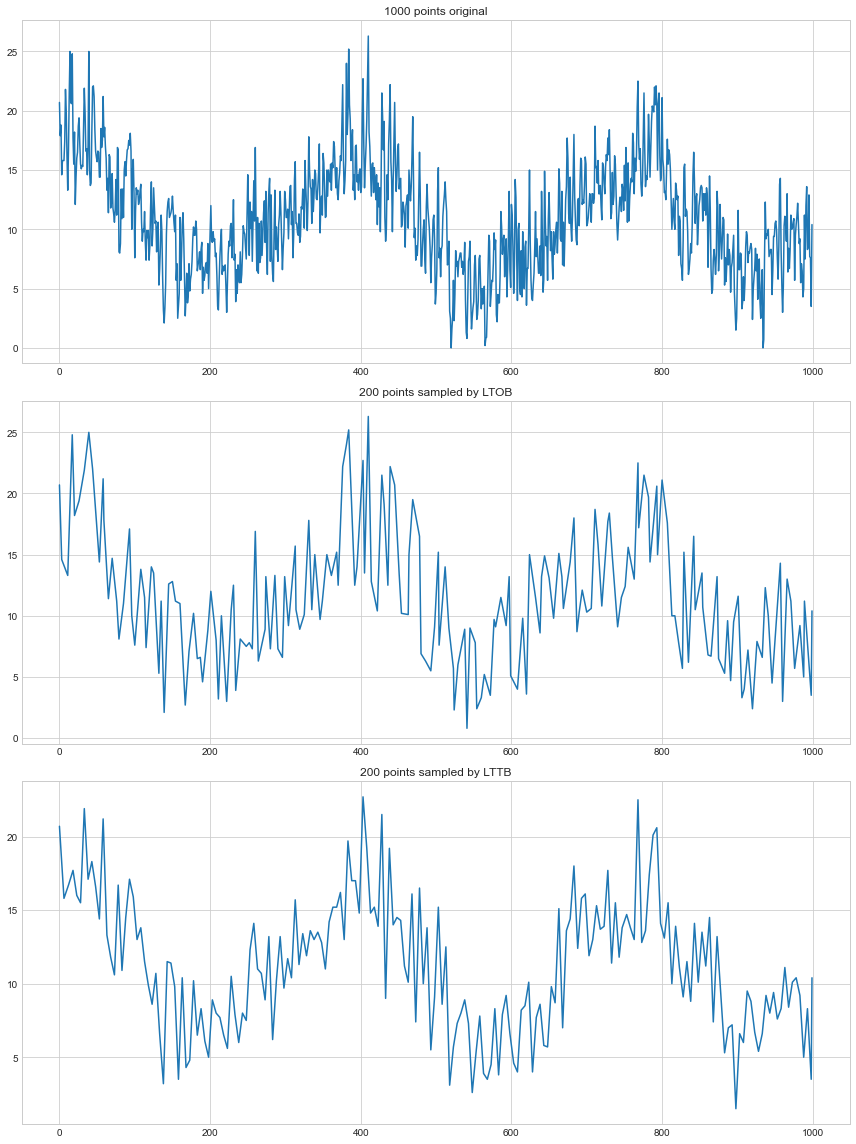

In [12]:
plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(12, 16))
axs[0].plot(X, Y)
axs[0].set_title(f"{n_points} points original")
axs[1].plot(A, B)
axs[1].set_title(f"{round(n_points * down_size)} points sampled by LTOB")
axs[2].plot(C, D)
axs[2].set_title(f"{round(n_points * down_size)} points sampled by LTTB")

fig.tight_layout()
plt.show()